In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import mplhep as hep
hep.style.use(hep.style.ATLAS)

from performance.utils import clean_pandas_df

IN_DIR = "data/initialize_everything/"
IN_FILE = "1insts_4gpus/gpu_1instance_sync.csv"
OUT_DIR = IN_DIR

data = pd.read_csv(IN_DIR + IN_FILE)
data = clean_pandas_df(data)
data

,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,...,gpu_memory_1_GB,gpu_memory_2_GB,gpu_memory_3_GB,gpu_total_memory_0_GB,gpu_total_memory_1_GB,gpu_total_memory_2_GB,gpu_total_memory_3_GB,total_gpu_usage,max_gpu_memory,percent_gpu_memory
0,1,4.00414,5,248,44,8,249293,67,1,246934,...,2.140144,2.498757,2.133852,85.899346,85.899346,85.899346,85.899346,69.1528,2.498757,2.908936
7,2,4.52636,5,257,37,7,441301,63,1,436830,...,2.733638,2.498757,2.733638,85.899346,85.899346,85.899346,85.899346,84.4795,2.733638,3.182373
6,3,4.40136,5,267,25,5,681319,64,1,682661,...,2.133852,2.733638,2.133852,85.899346,85.899346,85.899346,85.899346,86.6849,2.733638,3.182373
1,4,4.25414,5,284,15,4,940241,61,1,938767,...,2.498757,2.498757,2.498757,85.899346,85.899346,85.899346,85.899346,89.9726,2.498757,2.908936
3,5,4.27774,5,305,232918,4,934917,66,1,970269,...,2.498757,2.733638,2.733638,85.899346,85.899346,85.899346,85.899346,85.7671,2.733638,3.182373
2,6,4.27358,5,289,467499,3,936437,63,1,1398752,...,2.733638,2.498757,2.733638,85.899346,85.899346,85.899346,85.899346,85.0548,2.733638,3.182373
4,7,4.27775,5,313,700862,3,935561,64,1,1836179,...,2.733638,2.133852,2.133852,85.899346,85.899346,85.899346,85.899346,84.7534,2.733638,3.182373
5,8,4.29997,5,358,930024,3,930860,68,2,1861616,...,2.142241,2.498757,2.492465,85.899346,85.899346,85.899346,85.899346,81.0958,2.498757,2.908936


## Plot throughput vs concurrent requets

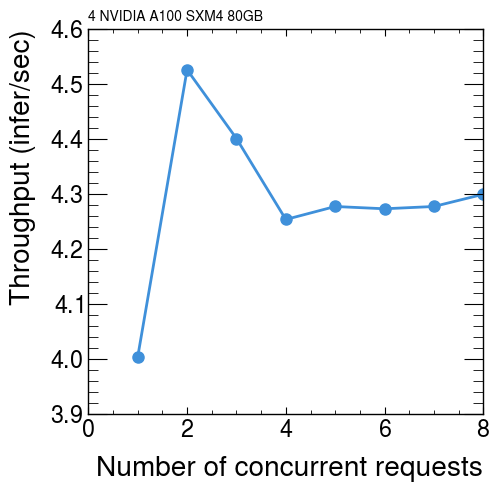

In [2]:
plt.figure(figsize=(5, 5))
plt.plot(data['Concurrency'].values, data['Inferences/Second'].values, 'o-', label='CPU')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('Throughput (infer/sec)', loc='top')
plt.title('4 NVIDIA A100 SXM4 80GB', fontsize=10, loc='left')

plt.savefig(f'{OUT_DIR}/concurrency_vs_throughput_2inst.pdf', bbox_inches='tight')
plt.show()

## Plot GPU utilization per GPU

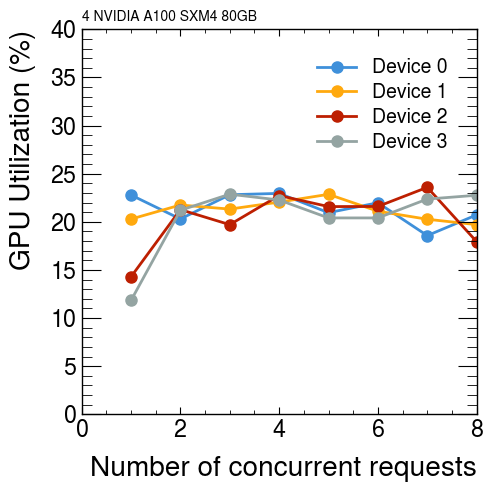

In [3]:
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.plot(data['Concurrency'].values, data[f'gpu_util_{i}'].values, 'o-', label=f'Device {i}')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('GPU Utilization (%)', loc='top')
plt.title('4 NVIDIA A100 SXM4 80GB', fontsize=10, loc='left')
plt.legend()
plt.ylim(0, 40)

plt.savefig(f'{OUT_DIR}/concurrency_vs_gpu_util_2inst.pdf', bbox_inches='tight')
plt.show()